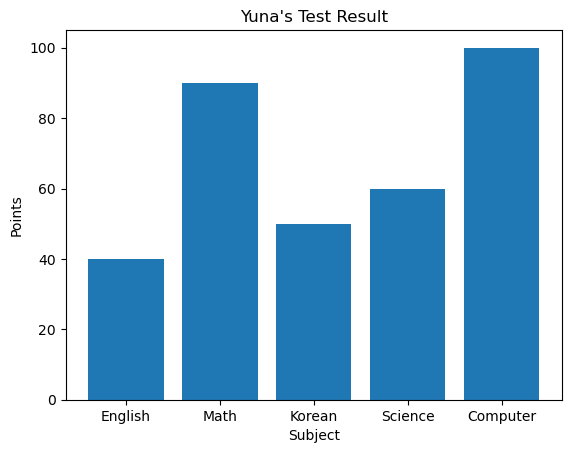

In [1]:
'''
파이썬으로 그래프를 그린다는건?
도화지를 펼치고 축을 그리고 그 안에 데이터를 그리는 작업

현실 세계에서 그래프를 그릴 때 어떻게 하나요? 노트를 펴서 사각형을 그리고, x, y축을 그리고, 그 안에 데이터를 입력하지요?
파이썬으로 그래프를 그리는 작업도 현실 세계와 비슷합니다.
'''

import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

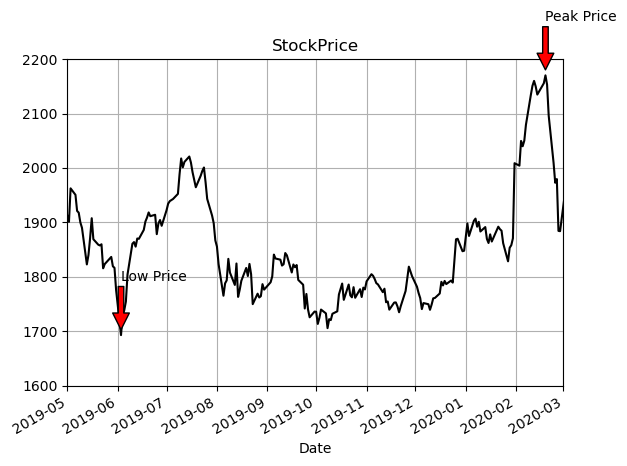

In [2]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터
csv_path = "/Users/bumchanpark/Desktop/Aiffel_Research/node/1. Data visualization/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

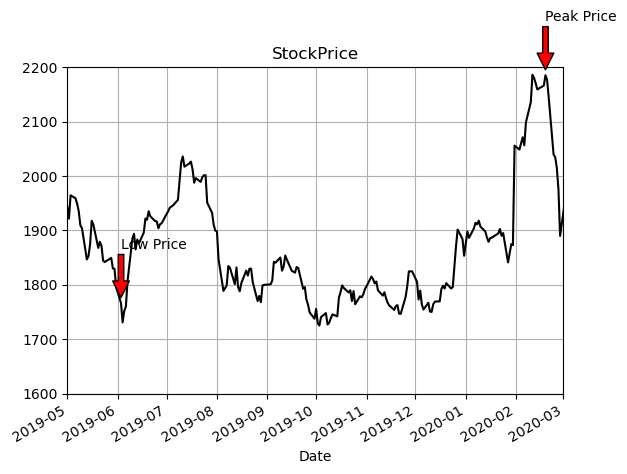

In [3]:
'''
Pandas Series 데이터 활용

Pandas의 Series는 선 그래프를 그리기에 최적의 자료구조를 갖추고 있습니다.
위 예시 코드에서는 price = data['Close']가 바로 Pandas의 Series입니다.
다음 스텝에서 좀 더 설명하겠지만, Pandas도 자체적인 선 그래프 그리기 기능을 제공합니다.
위 예시 코드에서는 price.plot(ax=ax, style='black')에서 Pandas의 plot을 사용하면서,
matplotlib에서 정의한 subplot 공간 ax를 사용한 것을 볼 수 있습니다.

좌표축 설정
plt.xlim(), plt.ylim()을 통해 x, y 좌표축의 적당한 범위를 설정해 줄 수 있습니다.


주석
그래프 안에 추가적으로 글자나 화살표 등 주석을 그릴 때는 annotate() 메서드를 이용합니다.
주석달기는 그래프 그리기의 고급 기법입니다. 복잡하지만 위 예시 코드를 잘 살펴봐 주세요.


그리드
grid() 메서드를 이용하면 그리드(격자눈금)를 추가할 수 있어요.
'''

# Q. 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프를 그려보세요!
# 그래프 데이터
csv_path = "/Users/bumchanpark/Desktop/Aiffel_Research/node/5. Data visualization/AMZN.csv"

data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()

# 주석달기
important_data = [(min_date, "Low Price"), (max_date, "Peak Price")]
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

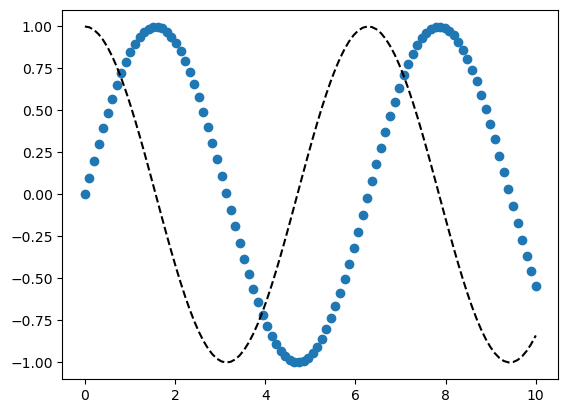

In [4]:
'''
5. 간단한 그래프 그리기 (3) plot 사용법 상세
plt.plot()로 그래프 그리기
앞에서 figure() 객체를 생성하고 add_subplot()으로 서브플롯을 생성한 다음 plot을 그린다고 했습니다.
이 2가지 과정을 생략할 수도 있는데요,
plt.plot() 함수로 그래프를 그리면 matplotlib은 가장 최근의 figure 객체와 그 서브플롯을 그립니다.

만약 서브플롯이 없으면 서브플롯 하나를 생성합니다.

plt.plot()의 인자로 x 데이터, y 데이터, 마커 옵션, 색상 등을 지정할 수 있고,
'''

import numpy as np

# 0에서 10까지 균등한 간격으로 100개의 숫자를 만들라는 뜻입니다.
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

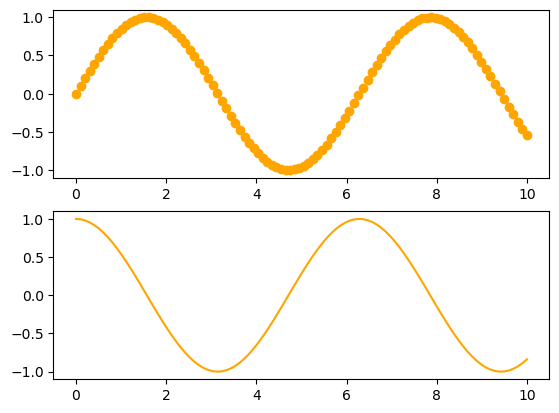

In [5]:
'''
서브플롯도 plt.subplot()을 이용해 추가할 수 있어요.
'''

x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange')
plt.show()

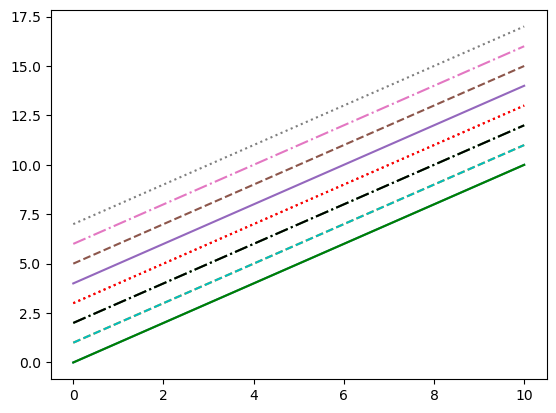

In [6]:
'''
linestyle, marker 옵션
라인 스타일은 plot()의 인자로 들어가는데요, 아래와 같이 다양한 방법으로 표기할 수 있습니다.
'''

x = np.linspace(0, 10, 100)

plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

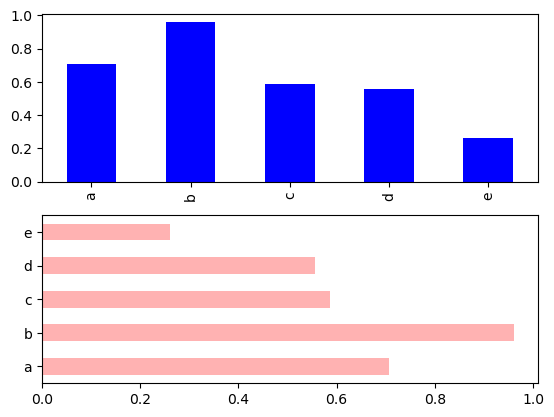

In [7]:
'''
Pandas로 그래프 그리기
Pandas도 plot() 메서드를 통해 여러 가지 그래프를 그릴 수 있습니다.

matplotlib과 연계해 사용하면 좋은데요, 아래에 각 메서드의 기능을 정리하였습니다.



pandas.plot 메서드 인자

label: 그래프의 범례 이름
ax: 그래프를 그릴 matplotlib의 서브플롯 객체
style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
alpha: 투명도 (0 ~ 1)
kind: 그래프의 종류: line, bar, barh, kde
logy: Y축에 대한 로그 스케일
use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
rot: 눈금 이름을 로테이션(0 ~ 360)
xticks, yticks: x축, y축으로 사용할 값
xlim, ylim: x축, y축 한계
grid: 축의 그리드 표시할지 여부

pandas의 data가 DataFrame 일 때 plot 메서드 인자

subplots: 각 DataFrame의 칼럼(column)을 독립된 서브플롯에 그립니다.
sharex: subplots=True면 같은 X축을 공유하고 축의 범위와 눈금을 연결합니다.
sharey: subplots=True면 같은 Y축을 공유합니다.
figsize: 그래프의 크기를 지정합니다. (튜플)
title: 그래프의 제목을 지정합니다. (문자열)
sort_columns: 칼럼을 알파벳 순서로 그립니다.

예제로 막대그래프를 그려 볼게요.

막대그래프의 경우, kind에 bar 옵션을 주어 그릴 수 있습니다.
'''

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
plt.show()

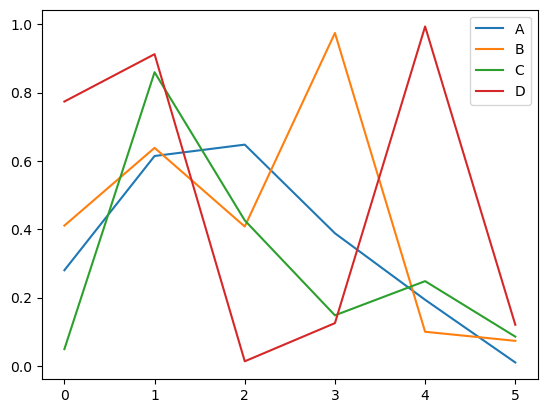

In [8]:
'''
선 그래프도 그리는 방법은 비슷합니다.
'''

df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')
plt.show()

In [9]:
'''
6. 간단한 그래프 그리기 (4) 정리해 보자
정리
그래프를 그리는 과정을 다시 정리해 봅시다.

fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐'줍니다.
ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
ax1.bar(x, y) 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어줍니다.
그래프 타이틀 축의 레이블 등을 plt의 여러 메서드 grid, xlabel, ylabel 을 이용해서 추가해 주고
plt.savefig 메서드를 이용해 저장해줍니다.
어떤가요? 현실 세계에서 그래프를 그리는 순서와 유사하지 않나요? 꽤 직관적입니다.
파이썬 기반의 시각화 라이브러리인 Pandas, Matplotlib, Seaborn 모두 이런 식으로 그래프를 그립니다.


아래 그림은 각 그래프 요소별 명칭입니다. 눈에 익혀 두세요.
'''

'''
7. 그래프 4대 천왕 (1) 데이터 준비
앞에서 그래프 그리는 방법에 대한 큰 틀을 배웠습니다! 이제 자주 사용되는 그래프를 직접 그려보며 연습해 봅시다.

데이터 준비
1) 데이터 불러오기
Seaborn의 load_dataset() 메서드를 이용하면 API를 통해 손쉽게 유명한 예제 데이터를 다운로드할 수 있습니다.
참고로, 아래 repo의 데이터는 모두 csv 파일로 되어있어 연습용으로 좋아요.

https://github.com/mwaskom/seaborn-data

메서드를 실행하면 home directory에 자동으로 seaborn-data라는 폴더가 생성되어 다운로드한 데이터가 내부에 저장됩니다.

default directory: ~/seaborn-data/ (~(물결표시)는 home directory를 의미합니다.😃)
'''
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [10]:
'''
2) 데이터 살펴보기 (EDA)
Pandas의 dataframe을 이용해서 데이터가 어떻게 구성되어 있는지 확인하겠습니다.
실행 후 결과를 살펴볼까요?
'''

df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# dataframe의 shape(row, column의 개수)
df.shape

(244, 7)

In [12]:
# 데이터의 통계량 정보를 보여줍니다. (평균, 표준편차, 사분위수 등)
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
# 각 column의 정보를 보여줍니다. (데이터 크기와 자료형 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
'''
본 데이터에는 결측 값이 없어서 결측 값 처리가 따로 필요하지 않네요.

데이터 변수들 중에서 sex, smoker, day, time이 범주(category)형 데이터고 tips, total_bill, size는 수치형 데이터입니다.
그러나 size는 테이블 인원을 의미하니까 범주형 데이터로 봐야겠네요.

범주형 변수의 카테고리별 개수를 알아볼까요?
'''

# Q. 다음 코드의 빈칸을 채워주세요.

# 'sex' 변수의 카테고리별 개수
print(df['sex'].value_counts())

print("===========================")

# 'time' 변수의 카테고리별 개수
# [[YOUR CODE]]
print(df['time'].value_counts())

print("===========================")

# 'smoker' 변수의 카테고리별 개수
# [[YOUR CODE]]
print(df['smoker'].value_counts())

print("===========================")

# 'day' 변수의 카테고리별 개수
# [[YOUR CODE]]
print(df['day'].value_counts())

print("===========================")

# 'size' 변수의 카테고리별 개수
# [[YOUR CODE]]
print(df['size'].value_counts())

print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [15]:
'''
8. 그래프 4대 천왕 (2) 범주형 데이터
데이터가 준비되었으니 그래프를 그려보겠습니다.

앞서 데이터를 살펴본 결과, 범주형 변수와 수치형 변수가 있다는 것을 알 수 있었는데요.

변수 데이터를 시각화할 때 데이터 종류에 따라 사용하는 그래프가 다르다는 걸 알고 계시나요?

지금부터 범주형, 수치형 순으로 총 4개의 그래프를 살펴보겠습니다.

범주형 데이터
범주형 데이터는 주로 막대그래프를 사용하여 수치를 요약합니다. 일반적으로 가로, 세로, 누적, 그룹화된 막대그래프를 사용합니다.

tips 데이터에서 범주형 변수는 sex, smoker, day, time, size입니다.

1) 막대그래프(bar graph)
1-1) Pandas와 Matplotlib를 활용한 방법
우선 조금 복잡한 방법부터 알아보겠습니다.

matplotlib에 데이터를 인자로 넣기 위해선 pandas 데이터를 바로 이용할 수는 없습니다.
데이터를 x에 series 또는 list, y에 list 형태로 각각 나눠주어야 합니다.

실행 되었습니다.
'''

# df의 첫 5행을 확인해봅시다.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
'''
tip 컬럼을 성별에 대한 평균으로 나타내 보겠습니다.
pandas의 groupby 메서드를 활용합니다.
'''

grouped = df['tip'].groupby(df['sex'], observed=False)

In [17]:
'''
어떤가요? 코드를 해석해 보면, df['tip'] 컬럼을 groupby() 한다는 뜻입니다. groupby()의 인자는 sex를 넣어 주었습니다.
이렇게 하면 각 성별 그룹에 대한 정보(총합, 평균, 데이터 량 등)가 grouped 객체에 저장됩니다.

아래 코드와 같이 평균과 데이터 량을 확인 할 수 있습니다.
'''

grouped.mean() # 성별에 따른 팁의 평균

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [18]:
grouped.size() # 성별에 따른 데이터 량(팁 횟수)

sex
Male      157
Female     87
Name: tip, dtype: int64

In [19]:
'''
이제 성별에 따른 팁 액수의 평균을 막대그래프로 나타내 보겠습니다.
'''

import numpy as np
sex = dict(grouped.mean()) #평균 데이터를 딕셔너리 형태로 바꿔줍니다.
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [20]:
x = list(sex.keys())
x

['Male', 'Female']

In [21]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

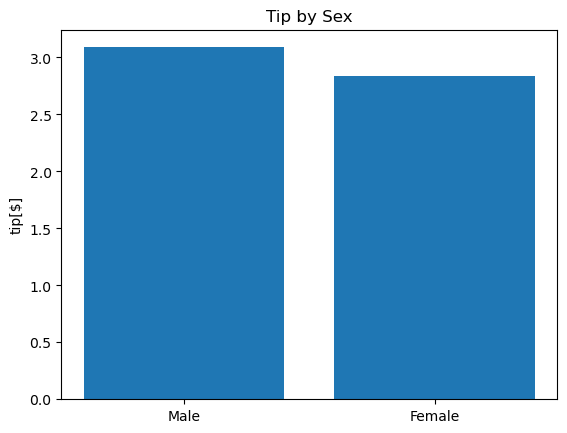

In [22]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

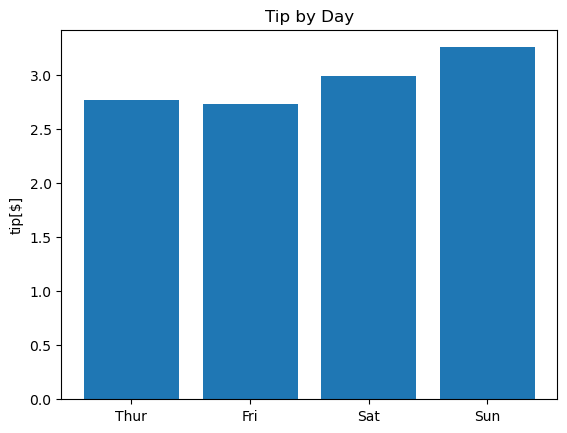

In [23]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

grouped = df['tip'].groupby(df['day'], observed=False)
day = dict(grouped.mean())
x = list(day.keys())
y = list(day.values())
plt.bar(x = x, height = y)

plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

<Axes: xlabel='sex', ylabel='tip'>

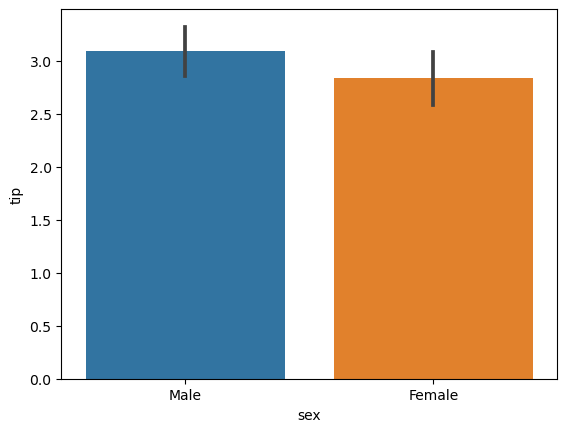

In [24]:
'''
1-2) Seaborn과 Matplotlib을 활용한 간단한 방법
Seaborn을 이용하면 더 쉽게 나타낼 수 있습니다.
sns.barplot의 인자로 df를 넣고 원하는 컬럼을 지정해 주면 아래와 같이 성별에 대한 tip 평균을 볼 수 있습니다.
'''

sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by sex')

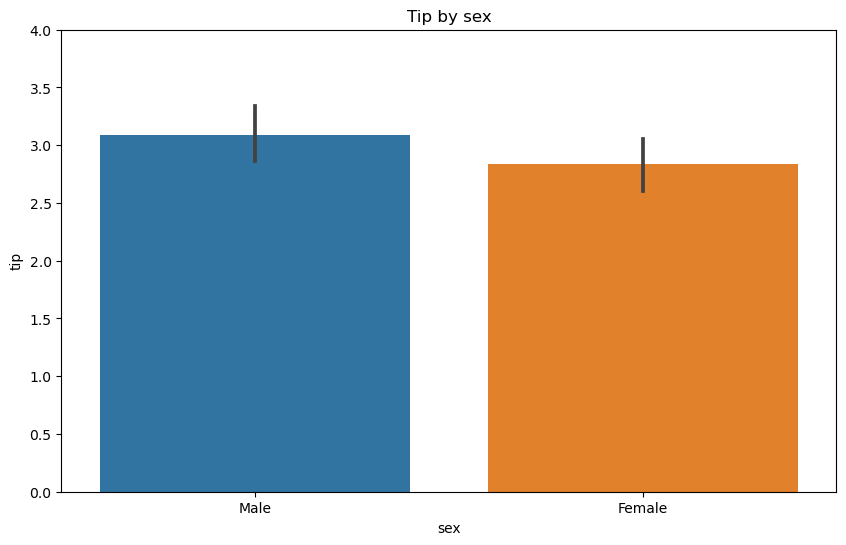

In [25]:
'''
Matplot과 함께 사용하여 figsize, title을 정하는 등 그래프에 다양한 옵션을 넣을 수도 있어요.
'''

plt.figure(figsize=(10,6)) # 도화지 사이즈를 정합니다.
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4) # y값의 범위를 정합니다.
plt.title('Tip by sex') # 그래프 제목을 정합니다.

Text(0.5, 1.0, 'Tip by day')

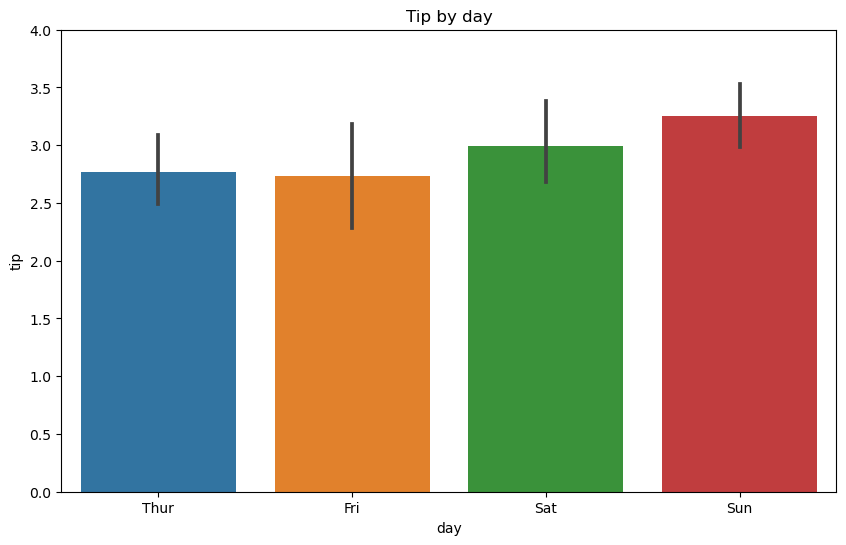

In [26]:
'''
아래는 요일에 따른 tips의 그래프입니다.
'''

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<Axes: xlabel='day', ylabel='tip'>

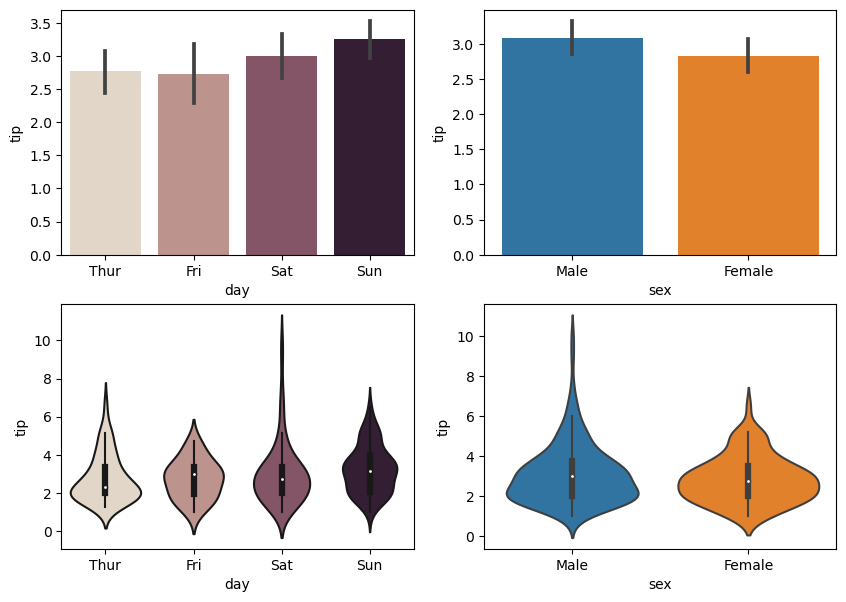

In [27]:
'''
Subplot을 활용할 수도 있고, 범주형 그래프를 나타내기에 좋은 violin plot을 사용할 수도 있습니다.
palette 옵션을 주어 더 예쁜 색상을 사용할 수도 있어요.
'''

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

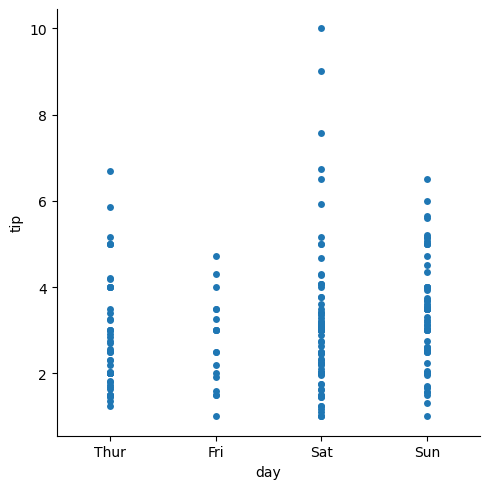

In [28]:
'''
catplot을 사용하여 나타낼 수도 있습니다.
'''

sns.catplot(x="day", y="tip", jitter=False, data=tips)

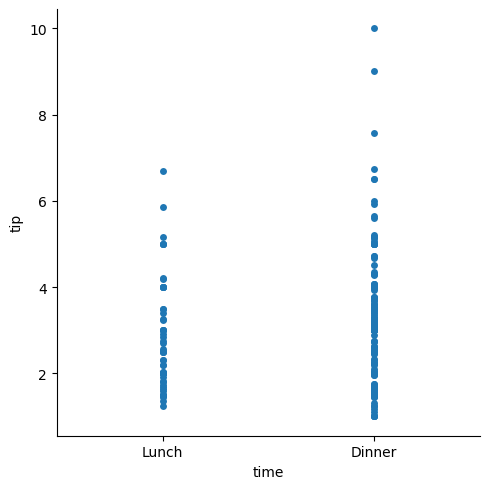

In [29]:
# Q. 시간대(time)에 따른 tips의 그래프를 catplot으로 표현해보세요!
sns.catplot(x="time", y="tip", jitter=False, data=tips)

/var/folders/49/7zxycpzj2jg_2v4sfzy166240000gn/T/ipykernel_96501/2612391516.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")


<Axes: xlabel='total_bill', ylabel='tip'>

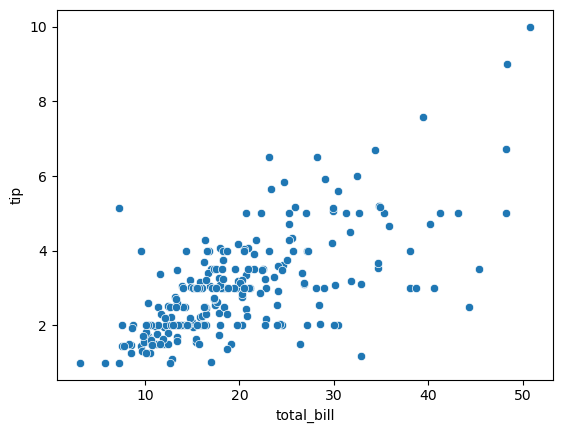

In [30]:
'''
9. 그래프 4대 천왕 (3) 수치형 데이터
수치형 데이터
수치형 데이터를 나타내는 데 가장 좋은 그래프는 산점도 혹은 선 그래프입니다.
전체 음식 가격(total_bill)에 따른 tip 데이터를 시각화하며 산점도와 선 그래프를 배워봅시다.

2) 산점도(scatter plot)
hue인자에 'day'를 주어 요일(day)에 따른 tip과 total_bill의 관계를 시각화해 봅시다.
'''

sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

<Axes: xlabel='total_bill', ylabel='tip'>

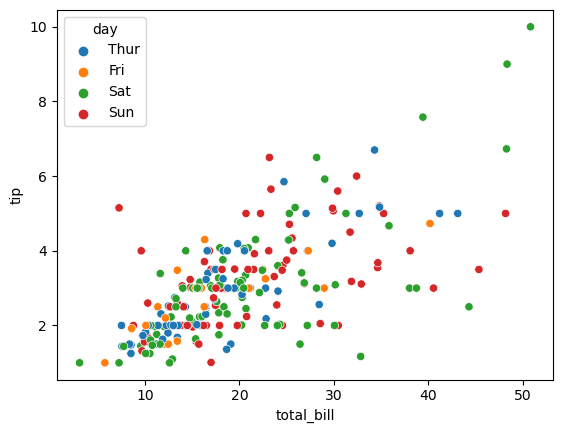

In [31]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

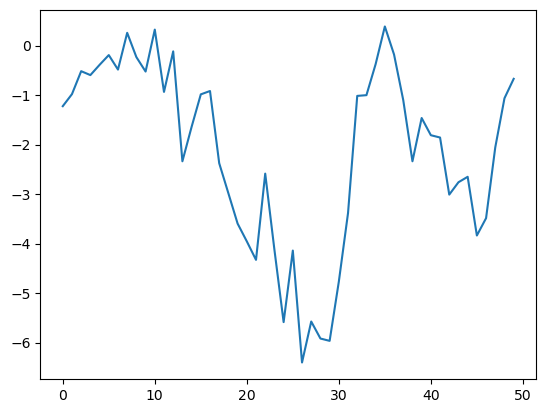

In [32]:
'''
3) 선 그래프(line graph)
plot의 기본은 선 그래프입니다.
tips 예제로는 선 그래프 설명이 어려워서, numpy를 이용하여 데이터를 생성 후 그래프를 그려보겠습니다.
'''

# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())
plt.show()

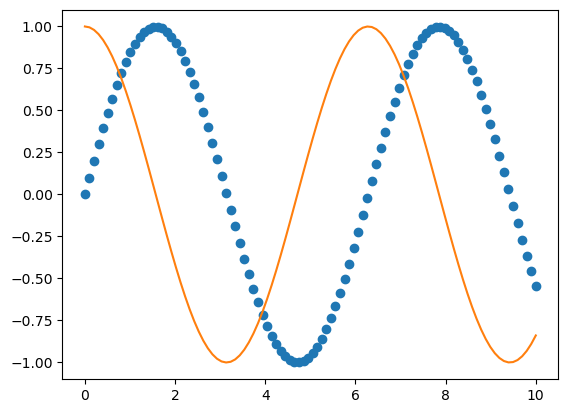

In [33]:
'''
앞 스텝에서 plt.plot() 함수의 예제로 설명했던 그래프도 선 그래프입니다.
'''

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

<Axes: >

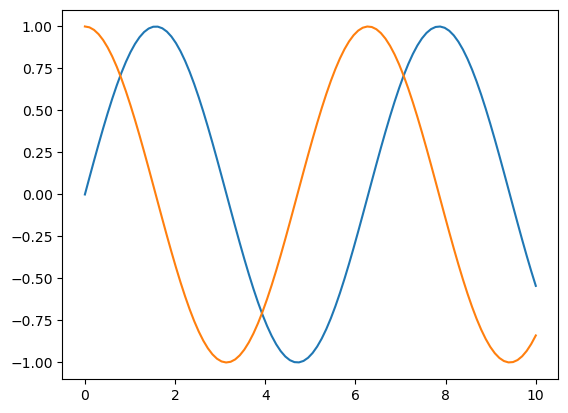

In [34]:
'''
Seaborn을 활용하면 다음과 같이 그릴 수 있습니다.
'''

sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

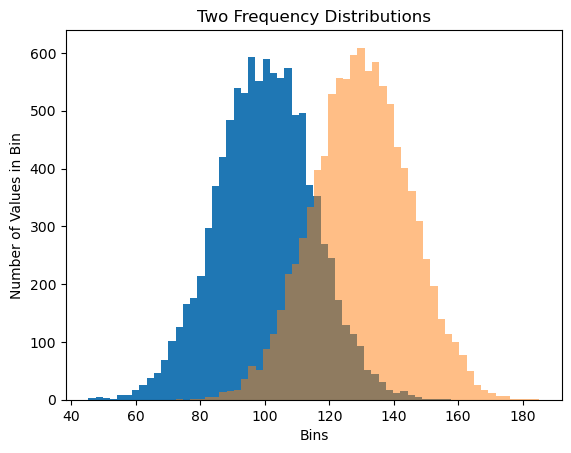

In [35]:
'''
4) 히스토그램
먼저 히스토그램의 개념 정리 한 번 하도록 할게요.
히스토그램은 도수분포표를 그래프로 나타낸 것입니다. 히스토그램의 용어는 다음과 같습니다.

↔ 가로축
계급: 변수의 구간, bin (or bucket)

↕ 세로축
도수: 빈도수, frequency
전체 총량: n

다음과 같은 데이터의 히스토그램을 만들어보겠습니다.

x1은 평균은 100이고 표준편차는 15인 정규분포를 따릅니다.
x2는 평균은 130이고 표준편차는 15인 정규분포를 따릅니다.
도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기합니다.
'''

#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

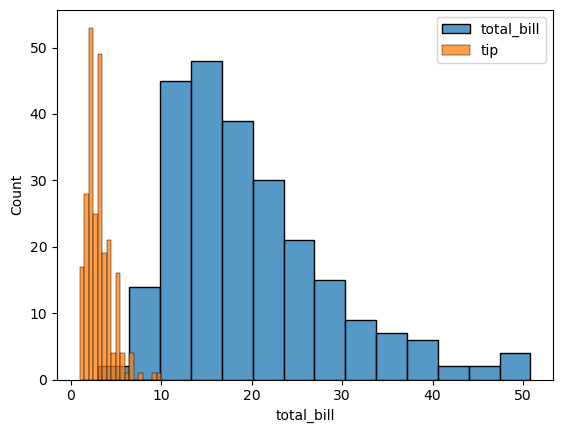

In [36]:
'''
예제 데이터의 히스토그램
조금 복습이 되셨나요? 다시 예제의 tips 데이터로 돌아가서 tips 데이터의 total_bill과 tips에 대해 히스토그램을 만들어 보겠습니다.
'''

sns.histplot(df['total_bill'], label="total_bill")

# legend()를 이용하여 label을 표시해줍니다.
sns.histplot(df['tip'], label="tip").legend()

Text(0.5, 1.0, 'tip_pct')

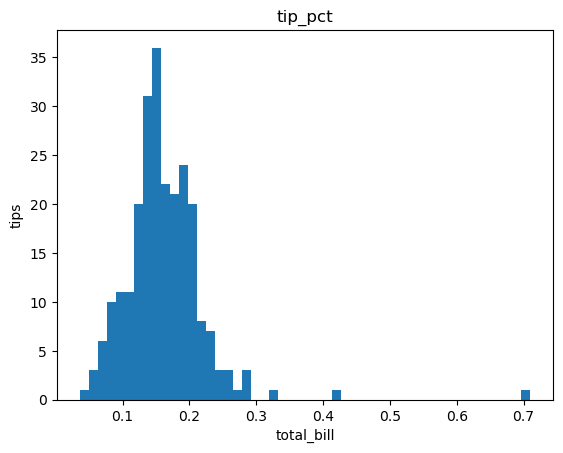

In [37]:
'''
전체 결제 금액 대비 팁의 비율을 나타내는 히스토그램을 그려보겠습니다.
'''

# Q. pyplot을 이용해서 그려봅시다.
# bin의 개수는 50개로 지정해주세요.
df['tip_pct'] = df['tip'] / df['total_bill'] # [[YOUR CODE]]

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
patches = ax1.hist(df['tip_pct'], bins=50, density=False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xlabel('total_bill')
plt.ylabel('tips')
ax1.set_title('tip_pct')

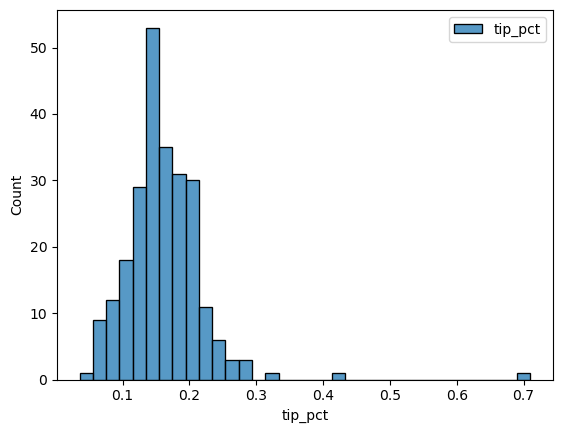

In [38]:
# Q. 이번에는 seaborn을 이용해서 그려봅시다.
sns.histplot(df['tip_pct'], label="tip_pct").legend()

<Axes: ylabel='Density'>

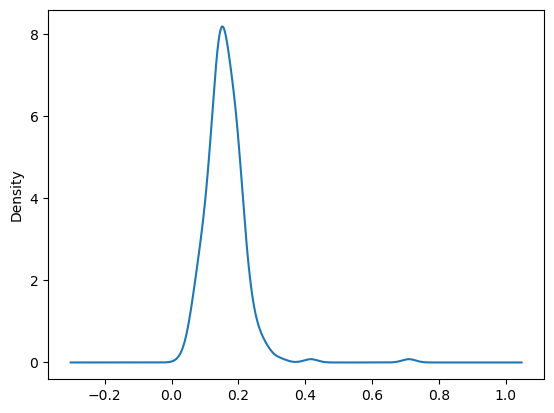

In [39]:
'''
kind='kde'로 확률 밀도 그래프로 나타내 보았습니다.
밀도 그래프: 연속된 확률분포를 나타냅니다.

일반적으로는 kernels메서드를 섞어서 이 분포를 근사하는 식으로 그립니다.
이것은 좀 더 단순하고 우리에게 친숙한 정규분포(가우시안)로 나타낼 수 있습니다.
위 밀도 그래프는 KDE(Kernel Density Estimate) 커널 밀도 추정 그래프입니다
'''

df['tip_pct'].plot(kind='kde')

In [40]:
'''
10. 시계열 데이터 시각화하기
우리 주위에는 시계열 데이터가 정말 많습니다.

이번에는 1949년-1960년도별 탑승객 예제 데이터를 가지고 시계열 데이터를 다루어 보도록 하겠습니다.

1) 데이터 가져오기
클라우드에 업로드되어있는 데이터를 이용하셔도 좋고 Seaborn의 load_dataset() 메서드를 이용하셔도 좋습니다.
'''

csv_path = "/Users/bumchanpark/Desktop/Aiffel_Research/node/5. Data visualization/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<Axes: xlabel='year', ylabel='passengers'>

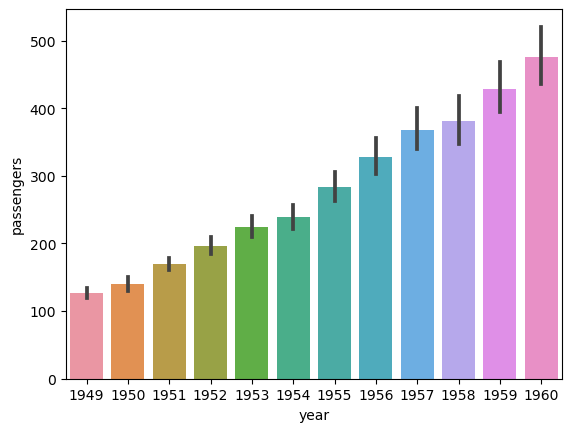

In [41]:
'''
데이터는 아주 간단하네요. 연도의 각 월별로 탑승객 수를 보여주고 있습니다.

2) 그래프 그리기
'''

# seaborn barplot
sns.barplot(data=flights, x='year', y='passengers')

<Axes: xlabel='year', ylabel='passengers'>

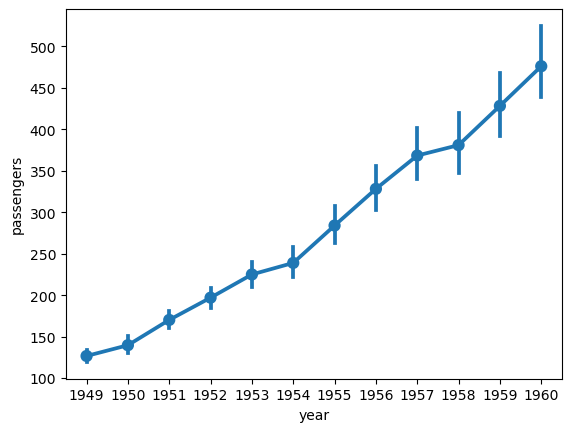

In [42]:
# Q. seaborn pointplot을 그려봅시다.
sns.pointplot(data=flights, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

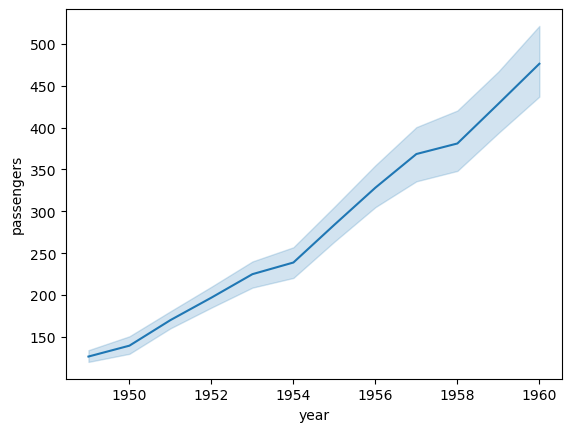

In [43]:
# Q. seaborn lineplot을 그려봅시다.
sns.lineplot(data=flights, x="year", y="passengers")

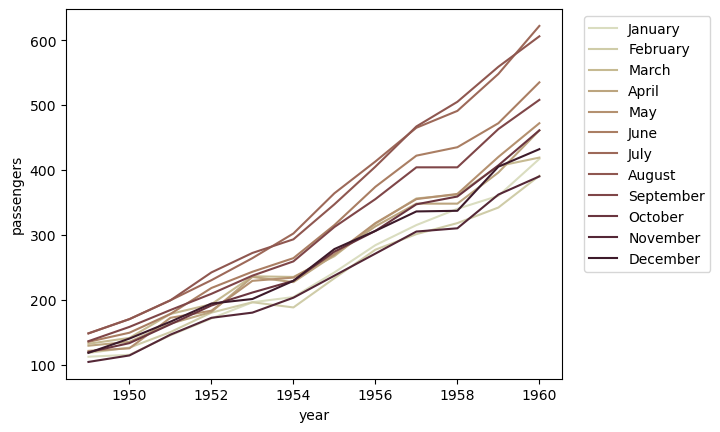

In [44]:
'''
달별로 나누어 보기 위해 hue 인자에 'month'를 할당합니다.
'''

sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

<Axes: xlabel='passengers', ylabel='Count'>

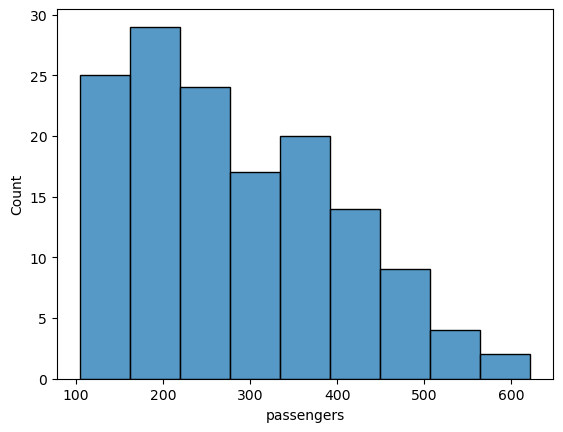

In [45]:
sns.histplot(flights['passengers'])

In [46]:
'''
11. Heatmap
Heatmap
Heatmap은 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것으로, 데이터 차원에 대한 제한은 없으나 모두 2차원으로 시각화하여 표현합니다.

예제 데이터의 연도와 달에 대해 탑승객 수를 heatmap으로 나타내보겠습니다.

❗ 잠깐만! pivot
Heatmap을 그리기 위해 데이터를 pivot 해야 하는 경우가 있습니다.
pivot이란 어떤 축, 점을 기준으로 바꾸다란 뜻입니다. 데이터 표를 재배치할 때도 pivot이라는 단어를 사용합니다.
(엑셀, Database에도 등장하는 용어입니다.)

pandas의 dataframe의 pivot() 메서드를 사용합니다.
flights(DataFrame)을 탑승객 수를 year과 month로 pivot 해보겠습니다.
'''

pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<Axes: xlabel='month', ylabel='year'>

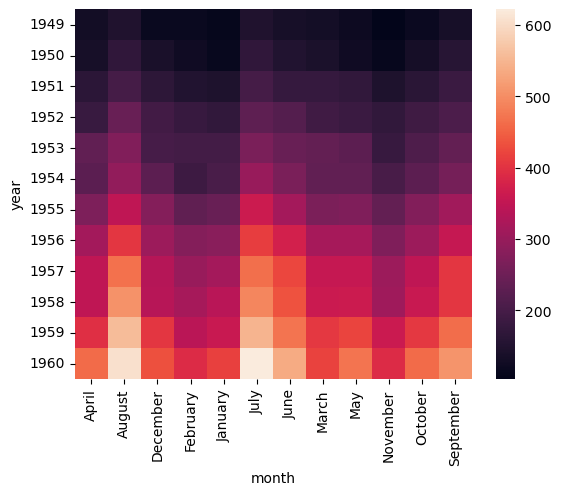

In [47]:
sns.heatmap(pivot)

<Axes: xlabel='month', ylabel='year'>

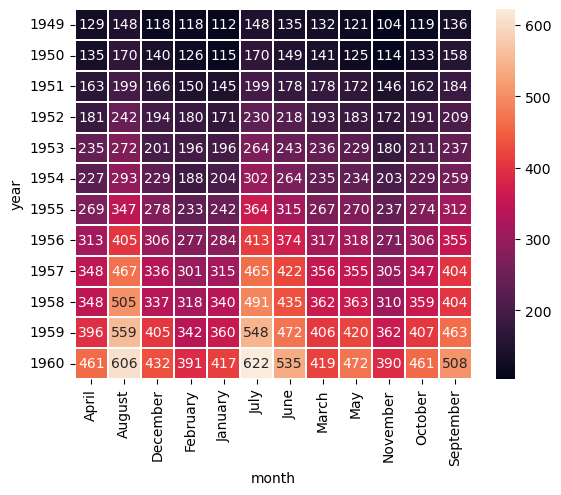

In [48]:
'''
다양한 옵션을 줄 수 있습니다.
'''

sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

<Axes: xlabel='month', ylabel='year'>

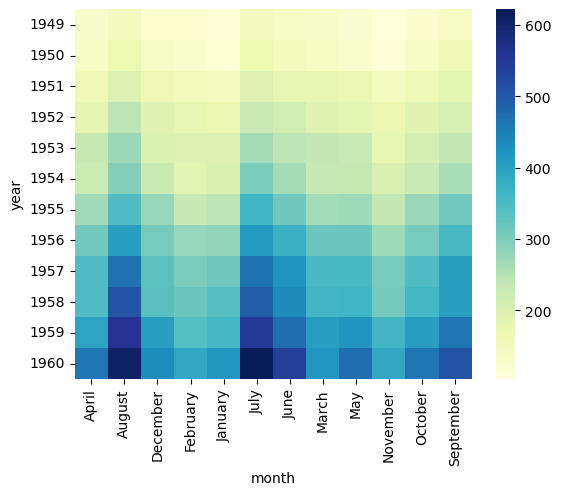

In [49]:
# Q. cmap 인자를 "YlGnBu"로 지정하여 heatmap을 그려보세요!
sns.heatmap(pivot, cmap="YlGnBu")

In [50]:
'''
종합퀴즈
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tips = sns.load_dataset("tips")

<Axes: xlabel='total_bill', ylabel='tip'>

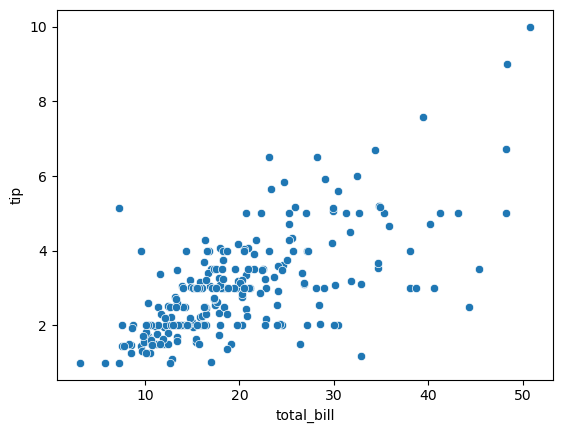

In [51]:
# Q. 시간대(time)에 따른 tip과 total_bill의 관계를 scatter plot으로 시각화해봅시다.
sns.scatterplot(data=tips, x="total_bill", y='tip')

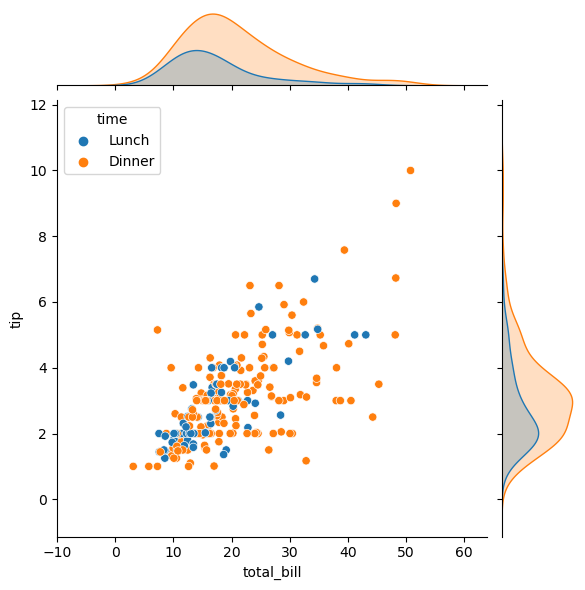

In [52]:
# Q. seaborn jointplot의 문서를 참고하여 아래와 같은 그래프를 그려보세요!
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time",
    kind="scatter",
)